In [1]:
import pandas as pd

In [2]:
data=pd.read_csv('dataset.csv')

In [3]:
data

,Unnamed: 0,Review,Ratings
0,0,good quality lakme kajal so black and long las...,5
1,1,you should definitely go for this kajal.. very...,5
2,2,great. flipkart always gives a safe packing. t...,4
3,3,the product is original one . packaging was go...,5
4,4,Super product 👍😍.My mother ordered this as my ...,5
...,...,...,...
20459,9984,Good,4
20460,9985,good phone.. value for money,5
20461,9986,Good products,5
20462,9987,good delivery and good mobile phone,5


In [4]:
pd.set_option('display.max_colwidth', -1)

<ipython-input-4-0891b765a168>:1: FutureWarning: Passing a negative integer is deprecated in version 1.0 and will not be supported in future version. Instead, use None to not limit the column width.
  pd.set_option('display.max_colwidth', -1)


In [5]:
import re
def  clean_text(df, text_field, new_text_field_name):
    df[new_text_field_name] = df[text_field].str.lower()
    df[new_text_field_name] = df[new_text_field_name].apply(lambda elem: re.sub(r"(@[A-Za-z0-9]+)|([^0-9A-Za-z \t])|(\w+:\/\/\S+)|^rt|http.+?", "", elem))  
    # remove numbers
    df[new_text_field_name] = df[new_text_field_name].apply(lambda elem: re.sub(r"\d+", "", elem))
    
    return df
data_clean = clean_text(data, 'Review', 'Review_clean')
data_clean.head()

,Unnamed: 0,Review,Ratings,Review_clean
0,0,good quality lakme kajal so black and long lasting good product thanks to flipkart good delivery package is good,5,good quality lakme kajal so black and long lasting good product thanks to flipkart good delivery package is good
1,1,you should definitely go for this kajal.. very smooth long lasting and best part smudge free.. its not 9 to 5 it's like 9 to the time when u want to remove it.. i wear this daily for my office. awesome one..,5,you should definitely go for this kajal very smooth long lasting and best part smudge free its not to its like to the time when u want to remove it i wear this daily for my office awesome one
2,2,great. flipkart always gives a safe packing. thank you and fast delivery. thank you.,4,great flipkart always gives a safe packing thank you and fast delivery thank you
3,3,the product is original one . packaging was good . I got the product in good condition. I am satisfied with my 😊😊,5,the product is original one packaging was good i got the product in good condition i am satisfied with my
4,4,Super product 👍😍.My mother ordered this as my birthday gift and I love it 😍😍😍😍.It is as like the image.,5,super product my mother ordered this as my birthday gift and i love it it is as like the image


special characters such as hashtags, punctuation and numbers are removed also all the text are converted to lower caste observe
difference in Review and Review_clean

In [6]:
import nltk.corpus
from nltk.corpus import stopwords
stop = stopwords.words('english')
data_clean['Review_clean'] = data_clean['Review_clean'].apply(lambda x: ' '.join([word for word in x.split() if word not in (stop)]))
data_clean.head()

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\teert\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


,Unnamed: 0,Review,Ratings,Review_clean
0,0,good quality lakme kajal so black and long lasting good product thanks to flipkart good delivery package is good,5,good quality lakme kajal black long lasting good product thanks flipkart good delivery package good
1,1,you should definitely go for this kajal.. very smooth long lasting and best part smudge free.. its not 9 to 5 it's like 9 to the time when u want to remove it.. i wear this daily for my office. awesome one..,5,definitely go kajal smooth long lasting best part smudge free like time u want remove wear daily office awesome one
2,2,great. flipkart always gives a safe packing. thank you and fast delivery. thank you.,4,great flipkart always gives safe packing thank fast delivery thank
3,3,the product is original one . packaging was good . I got the product in good condition. I am satisfied with my 😊😊,5,product original one packaging good got product good condition satisfied
4,4,Super product 👍😍.My mother ordered this as my birthday gift and I love it 😍😍😍😍.It is as like the image.,5,super product mother ordered birthday gift love like image


All the stop words such as and ,to,is,you etc are removed

In [7]:
import nltk 
from nltk.tokenize import sent_tokenize, word_tokenize
data_clean['Review_tokens'] = data_clean['Review_clean'].apply(lambda x: word_tokenize(x))
data_clean.head()

,Unnamed: 0,Review,Ratings,Review_clean,Review_tokens
0,0,good quality lakme kajal so black and long lasting good product thanks to flipkart good delivery package is good,5,good quality lakme kajal black long lasting good product thanks flipkart good delivery package good,"[good, quality, lakme, kajal, black, long, lasting, good, product, thanks, flipkart, good, delivery, package, good]"
1,1,you should definitely go for this kajal.. very smooth long lasting and best part smudge free.. its not 9 to 5 it's like 9 to the time when u want to remove it.. i wear this daily for my office. awesome one..,5,definitely go kajal smooth long lasting best part smudge free like time u want remove wear daily office awesome one,"[definitely, go, kajal, smooth, long, lasting, best, part, smudge, free, like, time, u, want, remove, wear, daily, office, awesome, one]"
2,2,great. flipkart always gives a safe packing. thank you and fast delivery. thank you.,4,great flipkart always gives safe packing thank fast delivery thank,"[great, flipkart, always, gives, safe, packing, thank, fast, delivery, thank]"
3,3,the product is original one . packaging was good . I got the product in good condition. I am satisfied with my 😊😊,5,product original one packaging good got product good condition satisfied,"[product, original, one, packaging, good, got, product, good, condition, satisfied]"
4,4,Super product 👍😍.My mother ordered this as my birthday gift and I love it 😍😍😍😍.It is as like the image.,5,super product mother ordered birthday gift love like image,"[super, product, mother, ordered, birthday, gift, love, like, image]"


Word tokenization performed on the provided data

In [8]:
from nltk.stem import WordNetLemmatizer
def word_lemmatizer(text):
    lem_text = [WordNetLemmatizer().lemmatize(i) for i in text]
    return lem_text
data_clean['Review_tokens_lemma'] = data_clean['Review_tokens'].apply(lambda x: word_lemmatizer(x))
data_clean.head()

,Unnamed: 0,Review,Ratings,Review_clean,Review_tokens,Review_tokens_lemma
0,0,good quality lakme kajal so black and long lasting good product thanks to flipkart good delivery package is good,5,good quality lakme kajal black long lasting good product thanks flipkart good delivery package good,"[good, quality, lakme, kajal, black, long, lasting, good, product, thanks, flipkart, good, delivery, package, good]","[good, quality, lakme, kajal, black, long, lasting, good, product, thanks, flipkart, good, delivery, package, good]"
1,1,you should definitely go for this kajal.. very smooth long lasting and best part smudge free.. its not 9 to 5 it's like 9 to the time when u want to remove it.. i wear this daily for my office. awesome one..,5,definitely go kajal smooth long lasting best part smudge free like time u want remove wear daily office awesome one,"[definitely, go, kajal, smooth, long, lasting, best, part, smudge, free, like, time, u, want, remove, wear, daily, office, awesome, one]","[definitely, go, kajal, smooth, long, lasting, best, part, smudge, free, like, time, u, want, remove, wear, daily, office, awesome, one]"
2,2,great. flipkart always gives a safe packing. thank you and fast delivery. thank you.,4,great flipkart always gives safe packing thank fast delivery thank,"[great, flipkart, always, gives, safe, packing, thank, fast, delivery, thank]","[great, flipkart, always, give, safe, packing, thank, fast, delivery, thank]"
3,3,the product is original one . packaging was good . I got the product in good condition. I am satisfied with my 😊😊,5,product original one packaging good got product good condition satisfied,"[product, original, one, packaging, good, got, product, good, condition, satisfied]","[product, original, one, packaging, good, got, product, good, condition, satisfied]"
4,4,Super product 👍😍.My mother ordered this as my birthday gift and I love it 😍😍😍😍.It is as like the image.,5,super product mother ordered birthday gift love like image,"[super, product, mother, ordered, birthday, gift, love, like, image]","[super, product, mother, ordered, birthday, gift, love, like, image]"


In [9]:
def word_pos_tagger(text):
    pos_tagged_text = nltk.pos_tag(text)
    return pos_tagged_text
data_clean['Review_tokens_pos_tagged'] = data_clean['Review_tokens_lemma'].apply(lambda x: word_pos_tagger(x))
data_clean.head()

,Unnamed: 0,Review,Ratings,Review_clean,Review_tokens,Review_tokens_lemma,Review_tokens_pos_tagged
0,0,good quality lakme kajal so black and long lasting good product thanks to flipkart good delivery package is good,5,good quality lakme kajal black long lasting good product thanks flipkart good delivery package good,"[good, quality, lakme, kajal, black, long, lasting, good, product, thanks, flipkart, good, delivery, package, good]","[good, quality, lakme, kajal, black, long, lasting, good, product, thanks, flipkart, good, delivery, package, good]","[(good, JJ), (quality, NN), (lakme, NN), (kajal, VB), (black, JJ), (long, JJ), (lasting, NN), (good, JJ), (product, NN), (thanks, NNS), (flipkart, RB), (good, JJ), (delivery, NN), (package, NN), (good, JJ)]"
1,1,you should definitely go for this kajal.. very smooth long lasting and best part smudge free.. its not 9 to 5 it's like 9 to the time when u want to remove it.. i wear this daily for my office. awesome one..,5,definitely go kajal smooth long lasting best part smudge free like time u want remove wear daily office awesome one,"[definitely, go, kajal, smooth, long, lasting, best, part, smudge, free, like, time, u, want, remove, wear, daily, office, awesome, one]","[definitely, go, kajal, smooth, long, lasting, best, part, smudge, free, like, time, u, want, remove, wear, daily, office, awesome, one]","[(definitely, RB), (go, VBP), (kajal, JJ), (smooth, RB), (long, RB), (lasting, VBG), (best, JJS), (part, NN), (smudge, VBP), (free, JJ), (like, IN), (time, NN), (u, JJ), (want, VBP), (remove, VB), (wear, JJ), (daily, JJ), (office, NN), (awesome, VBD), (one, CD)]"
2,2,great. flipkart always gives a safe packing. thank you and fast delivery. thank you.,4,great flipkart always gives safe packing thank fast delivery thank,"[great, flipkart, always, gives, safe, packing, thank, fast, delivery, thank]","[great, flipkart, always, give, safe, packing, thank, fast, delivery, thank]","[(great, JJ), (flipkart, NN), (always, RB), (give, VBP), (safe, JJ), (packing, VBG), (thank, NN), (fast, JJ), (delivery, NN), (thank, NN)]"
3,3,the product is original one . packaging was good . I got the product in good condition. I am satisfied with my 😊😊,5,product original one packaging good got product good condition satisfied,"[product, original, one, packaging, good, got, product, good, condition, satisfied]","[product, original, one, packaging, good, got, product, good, condition, satisfied]","[(product, NN), (original, JJ), (one, CD), (packaging, NN), (good, JJ), (got, VBD), (product, NN), (good, JJ), (condition, NN), (satisfied, VBD)]"
4,4,Super product 👍😍.My mother ordered this as my birthday gift and I love it 😍😍😍😍.It is as like the image.,5,super product mother ordered birthday gift love like image,"[super, product, mother, ordered, birthday, gift, love, like, image]","[super, product, mother, ordered, birthday, gift, love, like, image]","[(super, JJ), (product, NN), (mother, NN), (ordered, VBD), (birthday, JJ), (gift, NN), (love, NN), (like, IN), (image, NN)]"


In [32]:
data_clean['Review_tokens_pos_tagged']

0        [(good, JJ), (quality, NN), (lakme, NN), (kajal, VB), (black, JJ), (long, JJ), (lasting, NN), (good, JJ), (product, NN), (thanks, NNS), (flipkart, RB), (good, JJ), (delivery, NN), (package, NN), (good, JJ)]                                                        
1        [(definitely, RB), (go, VBP), (kajal, JJ), (smooth, RB), (long, RB), (lasting, VBG), (best, JJS), (part, NN), (smudge, VBP), (free, JJ), (like, IN), (time, NN), (u, JJ), (want, VBP), (remove, VB), (wear, JJ), (daily, JJ), (office, NN), (awesome, VBD), (one, CD)]
2        [(great, JJ), (flipkart, NN), (always, RB), (give, VBP), (safe, JJ), (packing, VBG), (thank, NN), (fast, JJ), (delivery, NN), (thank, NN)]                                                                                                                            
3        [(product, NN), (original, JJ), (one, CD), (packaging, NN), (good, JJ), (got, VBD), (product, NN), (good, JJ), (condition, NN), (satisfied, VBD)]                              

In [25]:
cols_to_drop = ['Review', 'Review_clean', 'Review_tokens','Review_tokens_pos_tagged']
train_data = data_clean.drop(cols_to_drop, axis=1)

In [26]:
train_data

,Unnamed: 0,Ratings,Review_tokens_lemma
0,0,5,"[good, quality, lakme, kajal, black, long, lasting, good, product, thanks, flipkart, good, delivery, package, good]"
1,1,5,"[definitely, go, kajal, smooth, long, lasting, best, part, smudge, free, like, time, u, want, remove, wear, daily, office, awesome, one]"
2,2,4,"[great, flipkart, always, give, safe, packing, thank, fast, delivery, thank]"
3,3,5,"[product, original, one, packaging, good, got, product, good, condition, satisfied]"
4,4,5,"[super, product, mother, ordered, birthday, gift, love, like, image]"
...,...,...,...
20459,9984,4,[good]
20460,9985,5,"[good, phone, value, money]"
20461,9986,5,"[good, product]"
20462,9987,5,"[good, delivery, good, mobile, phone]"


In [ ]:
#Review_tokens_pos_tagged

In [13]:
data_clean.isnull().sum()

Unnamed: 0                  0
Review                      0
Ratings                     0
Review_clean                0
Review_tokens               0
Review_tokens_lemma         0
Review_tokens_pos_tagged    0
dtype: int64

In [14]:
data_clean.shape

(20464, 7)

In [15]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

(0.0, 6.0)

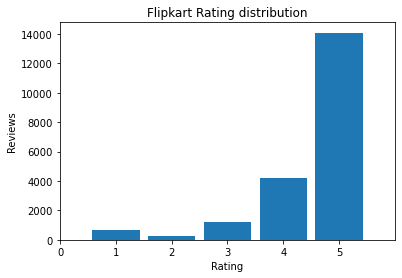

In [17]:
rating = data_clean['Ratings']
bins = np.arange(7) - 0.5
plt.hist(rating, bins=bins, rwidth=0.85)
plt.xticks(range(6))
plt.ylabel('Reviews')
plt.xlabel('Rating')
plt.title('Flipkart Rating distribution')
plt.xlim([0, 6])

Rating 5 has the most highest frequencies

In [19]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split
from sklearn.svm import LinearSVC
from sklearn.metrics import classification_report

In [20]:
tfidf=TfidfVectorizer(max_features=30000, ngram_range=(1,5), analyzer='char')

In [38]:
x=tfidf.fit_transform((train_data['Review_tokens_lemma']))

AttributeError: 'list' object has no attribute 'lower'

In [32]:
type(data_clean['Review_tokens_lemma'])

pandas.core.series.Series

In [74]:
X.shape

(20464, 1244)

In [75]:
y.shape

(20464,)

In [76]:
X_train, X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=0)

In [77]:
X_train.shape

(16371, 1244)

In [78]:
y_train.shape

(16371,)

In [80]:
clf=LinearSVC(C=20, class_weight='balanced')
clf.fit(X_train,y_train)

LinearSVC(C=20, class_weight='balanced')

In [81]:
y_pred=clf.predict(X_test)

In [82]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           1       0.00      0.00      0.00       127
           2       0.00      0.00      0.00        46
           3       0.00      0.00      0.00       249
           4       0.00      0.00      0.00       834
           5       0.69      1.00      0.82      2837

    accuracy                           0.69      4093
   macro avg       0.14      0.20      0.16      4093
weighted avg       0.48      0.69      0.57      4093

